# SOM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

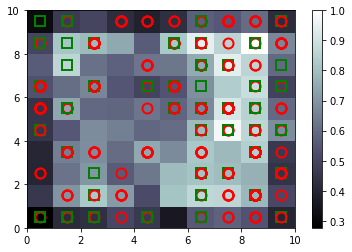

In [2]:
"""## Importing the dataset"""

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

"""## Feature Scaling"""

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

"""##Training the SOM"""

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

"""##Visualizing the results"""

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [3]:
result = som.distance_map().T[:,:]

In [4]:
print(result)
print(result.shape[0]) # rows
print(result.shape[1]) # columns

[[0.27670891 0.41649423 0.43252215 0.50643249 0.4627355  0.35596012
  0.55646811 0.58136528 0.54242895 0.39687928]
 [0.45526313 0.69509309 0.82202754 0.71373259 0.52047403 0.80869547
  0.86811785 0.86288537 0.781331   0.51084055]
 [0.39759527 0.61865558 0.70225541 0.56530887 0.62993589 0.79089088
  0.80978746 0.79465498 0.76329297 0.44514642]
 [0.39951032 0.64920025 0.68353714 0.60397754 0.74366546 0.67516814
  0.82145873 0.78271551 0.84292054 0.46243143]
 [0.45420381 0.55474348 0.68063319 0.65003378 0.59064459 0.60442782
  0.78980311 0.97422639 0.86626342 0.68238775]
 [0.45134038 0.73883871 0.59544284 0.58886072 0.62635677 0.58743862
  0.67097307 0.91795466 0.85093561 0.59787036]
 [0.53443549 0.60900792 0.66608556 0.54940669 0.49974488 0.54484336
  0.6837632  0.83839937 0.88846685 0.4939596 ]
 [0.5662508  0.863145   0.61391926 0.57880513 0.62503505 0.62770548
  0.74957991 0.94447762 0.86004818 0.59869529]
 [0.50258779 0.81720575 0.78544975 0.74398447 0.56539049 0.82139776
  0.94651703

In [5]:
maxValues = []
threshold = 0.9
for j in range(result.shape[0]):
    for i in range(result.shape[1]):
        #print("[", i, ", ", j, "] : ", result[j,i])
        if(threshold < result[j,i]):
            maxValues.append((i, j))

print(maxValues)

[(7, 4), (7, 5), (7, 7), (6, 8), (8, 8)]


In [6]:
mappings = som.win_map(X)

frauds = mappings[maxValues[0]]
for i in range(1, len(maxValues)):
    frauds = np.concatenate((mappings[maxValues[i]], frauds), axis = 0)

frauds = sc.inverse_transform(frauds)
print("Fraud Customer IDs","(",frauds.shape[0],")")
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs ( 49 )
15571121
15660390
15608595
15577515
15652658
15624595
15644878
15671987
15590434
15671014
15593345
15609356
15588123
15572390
15575243
15631693
15586174
15776156
15783859
15713983
15709252
15701885
15753550
15745804
15724851
15810485
15788224
15787229
15763194
15713160
15790113
15735330
15809909
15758477
15796413
15776921
15766183
15808662
15684722
15734649
15717629
15757188
15604536
15635598
15647191
15793896
15650591
15633608
15675450


# ANN

## Creating the matrix of features

In [8]:
customers = dataset.iloc[:, 1:].values

## Creating the dependent variable

In [9]:
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

## Building and train ANN

In [10]:
import tensorflow as tf

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [12]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=2, kernel_initializer="uniform", activation='relu', input_dim=15))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer="uniform", activation='sigmoid'))

In [13]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 3s 2ms/step - loss: 0.5357 - accuracy: 0.9217
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.2945 - accuracy: 0.9290


In [15]:
# Predicting the probabilities of frauds
y_pred = ann.predict(customers)
# dataset.iloc[:,0:1] : make 2D array for concatenate
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
print(y_pred)

[[1.57761560e+07 1.16759777e-01]
 [1.57395480e+07 8.10389221e-02]
 [1.56628540e+07 6.87889457e-02]
 ...
 [1.56754500e+07 1.51525587e-01]
 [1.57764940e+07 1.29713267e-01]
 [1.55924120e+07 1.66454762e-01]]


In [16]:
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

[[1.57997850e+07 1.91061795e-02]
 [1.56214230e+07 2.06187665e-02]
 [1.56364540e+07 2.36539841e-02]
 ...
 [1.55904340e+07 3.39867920e-01]
 [1.55881230e+07 3.39867920e-01]
 [1.56646150e+07 3.39867920e-01]]
